In [2]:
from sympy import *
from sympy.plotting import plot
from numpy import *
import numpy as np
from scipy import *
from scipy.optimize import fsolve
from scipy.stats import uniform, chi2
import matplotlib.pyplot as plt

%matplotlib inline 

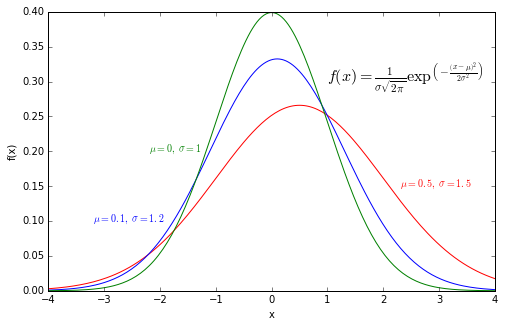

In [59]:
x = np.linspace(-4, 4, 200)
expr = 1/(1.5 * np.sqrt(2*pi)) * np.exp(-(x-0.5)**2 / (2*1.5**2))
expr2= 1/(1.2 * np.sqrt(2*pi)) * np.exp(-(x-0.1)**2 / (2*1.2**2))
expr3= 1/(1 * np.sqrt(2*pi)) * np.exp(-(x-0)**2 / (2*1**2))

#evalfunc1 = lambdify(x, expr, modules=['numpy'])
#evalfunc2 = lambdify(x, expr2, modules=['numpy'])
#evalfunc3 = lambdify(x, expr3, modules=['numpy'])
fig = plt.gcf() 
fig.set_size_inches(8,5)
 
plt.plot(x,expr,'r', x, expr2, 'b', x, expr3, 'g')
plt.text(-2.2,0.2, r'$\mu=0,\;\sigma = 1$', color = "green") 
plt.text(-3.2,0.1, r'$\mu=0.1,\;\sigma = 1.2$', color = "b") 
plt.text(2.3,0.15, r'$\mu=0.5,\;\sigma = 1.5$', color = "r") 
plt.text(1.0, 0.3, r'$f(x) =\frac{1}{\sigma\sqrt{2 \pi}} \exp^{\left(-\frac{{\left(x-\mu \right)}^{2}}{2\sigma^{2}}\right)}$', fontsize = 16)
#plt.text(2, 0.25, r'$1/(\sigma * \sqrt(2*\pi)) * exp(-(\mu-x)**2 / (2*0.8**2))$') 
plt.xlabel("x")
plt.ylabel("f(x)") 

Finding zero of the function. $B= \frac{1}{2}\Big[ 1 + 0.196854 |z| + 0.115194 |z|^2 + 0.000344|z|^3 +  0.019527 |z|^4 \Big]^{-4}$ . Check Tutorial 1 problem 1b

In [12]:
prob1b = lambda x : (1/2)*(1+0.196854*x + 0.115194*x**2 + 0.000344*x**3 + 0.019527*x**4 )**(-4)-0.05
result = fsolve(prob1b, 0)
result

array([ 1.6430741])

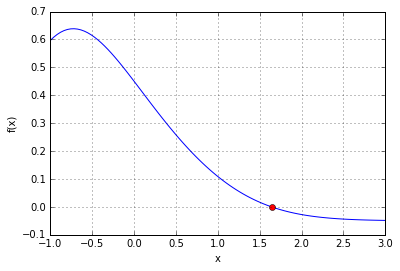

In [60]:
x = np.linspace(-1,3,100)
ax=plt.plot(x,prob1b(x),result,prob1b(result),'ro')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")

-c:5: RuntimeWarning: divide by zero encountered in log
-c:5: RuntimeWarning: invalid value encountered in true_divide
-c:6: RuntimeWarning: divide by zero encountered in log
-c:6: RuntimeWarning: invalid value encountered in true_divide


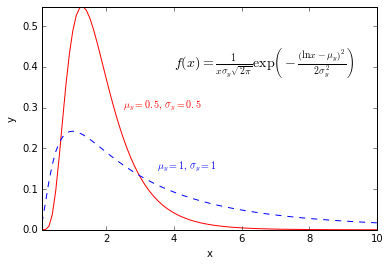

In [61]:
mu1, sigma1 = 0.5, 0.5
mu2, sigma2 = 1., 1.
x = np.linspace(0., 10, 100)

pdf1 = (np.exp(-(np.log(x) - mu1)**2 / (2 * sigma1**2))/ (x * sigma1 * np.sqrt(2 * np.pi)))
pdf2 = (np.exp(-(np.log(x) - mu2)**2 / (2 * sigma2**2))/ (x * sigma2 * np.sqrt(2 * np.pi)))
plt.plot(x, pdf1,'r', x,pdf2,'b--')   
plt.axis('tight')
plt.text(2.5, 0.3, r'$\mu_y = 0.5, \, \sigma_y = 0.5 $', color = "r")
plt.text(3.5, 0.15, r'$\mu_y = 1, \, \sigma_y = 1 $', color = "b")
plt.text(4, 0.4, r'$f(x) =\frac{1}{x\sigma_y\sqrt{2 \pi}} \exp{\left(-\frac{{\left(\ln x-\mu_y \right)}^{2}}{2\sigma_y^{2}}\right)}$', fontsize = 14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show() 


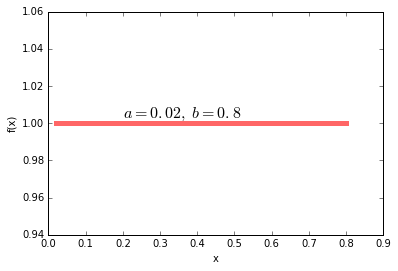

In [67]:
x = np.linspace(uniform.ppf(0.02), uniform.ppf(0.8), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.text(0.2, 1.003 , r'$a = 0.02,\; b = 0.8$', fontsize = 16)
plt.show() 

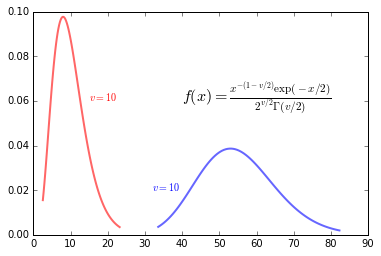

In [12]:
fig, ax = plt.subplots(1, 1)
v1 = 10 # degree of freedom
v2 = 55

x1 = np.linspace(chi2.ppf(0.01, v1), chi2.ppf(0.99, v1), 100)
x2 = np.linspace(chi2.ppf(0.01, v2), chi2.ppf(0.99, v2), 100)

ax.plot(x1, chi2.pdf(x1, v1), 'r-', lw=2, alpha=0.6, label='chi2 pdf') 
ax.plot(x2, chi2.pdf(x2, v2), 'b-', lw=2, alpha=0.6, label='chi2 pdf') 

ax.text(15, 0.06, r'$ v = 10$', color = "r")
ax.text(32, 0.02, r'$ v = 10$', color = "b")
ax.text(40, 0.06, r'$ f(x) = \frac{x^{-(1-v/2)}\exp(-x/2)}{2^{v/2}\Gamma(v/2)}$', fontsize=16)
